# Import data wrangling and analytics library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib
from sklearn.pipeline import Pipeline
import xgboost as xgb
from pandas_profiling import ProfileReport


import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)



plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Data read 

In [3]:
df=pd.read_csv("Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Drop the missing rows
df = df.dropna(how='any',axis=0,)
# testDf = testDf.dropna(how='any',axis=0,)

In [8]:
# set index as customerID
df.set_index('customerID', inplace= True)
# testDf.set_index('customerID', inplace= True)

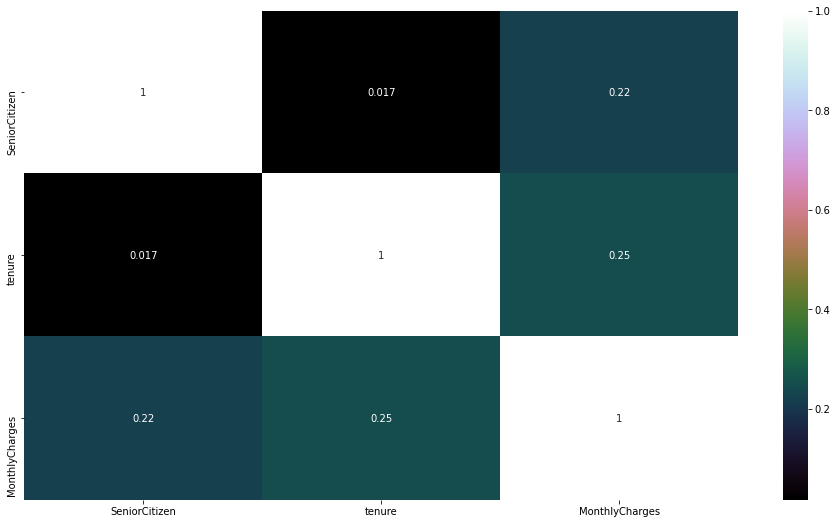

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, cmap="cubehelix")
plt.show()

In [10]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


# Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='Churn'>

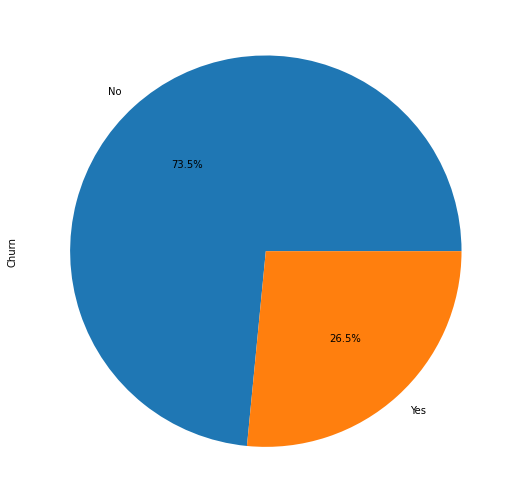

In [11]:
(df.groupby('Churn')['Churn'].count()).plot.pie(autopct='%1.1f%%',figsize=(16,9))

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

gender


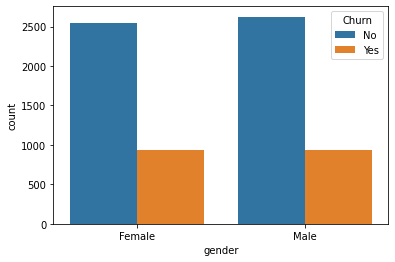

Partner


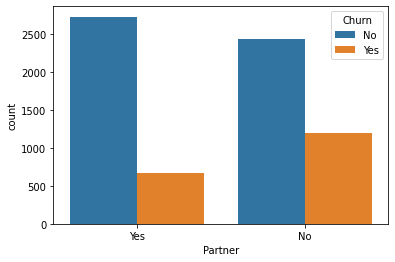

Dependents


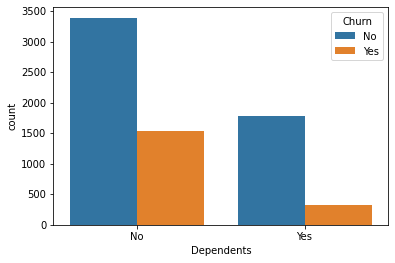

PaperlessBilling


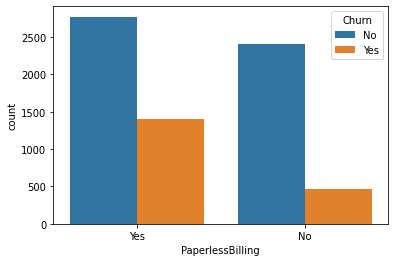

In [13]:
cat_col = ['gender', 'Partner', 'Dependents', 'PaperlessBilling']

for col in cat_col:
    print(col)
    sns.countplot(col,hue='Churn',data=df,)
    plt.show()

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

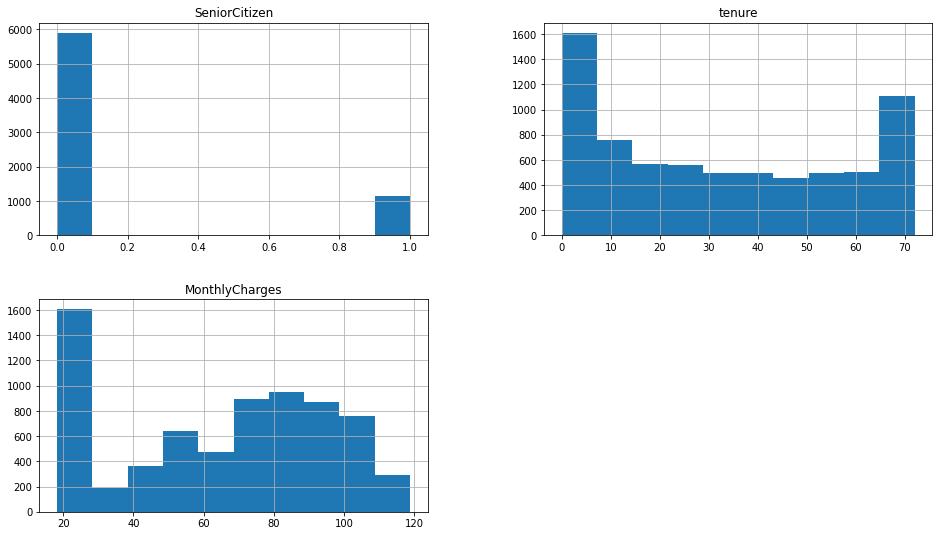

In [14]:
df.hist(figsize=(16,9))

# Data Pipeline

In [15]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=333)

In [17]:
drop_feat=  ['gender','PhoneService','MultipleLines', 'PaperlessBilling','PaymentMethod'] # 'customerID',
numeric_features = ['tenure', 'TotalCharges']
categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

In [18]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
def remove_spaces(input_df):
    input_df["TotalCharges"] = input_df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)
    return input_df


class SpaceImputeTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [20]:
numeric_transformer = Pipeline(steps=[
                                     ('meanimputer', SimpleImputer(strategy='mean')),
                                     ('stdscaler', StandardScaler())
                                     ])

categorical_transformer = Pipeline(steps=[
                                         ('onehotenc', OneHotEncoder(handle_unknown='ignore'))
                                         ])

In [21]:
col_transformer = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feat),
                                                   ('numeric_processing',numeric_transformer, numeric_features),
                                                    ('categorical_processing', categorical_transformer, categorical_features)
                                                  ], remainder='drop')

In [22]:
pipeline = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                    ])

In [23]:
pipeline.fit(X_train)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x000001CB438D86C8>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['gender', 'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'TotalCharges']),
 

In [24]:
transformed_train=pipeline.transform(X_train)
transformed_train.shape

(4930, 34)

In [25]:
pd.DataFrame(transformed_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1.525607,1.499207,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.470324,0.357160,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.916790,0.834864,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.193775,-0.912924,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.876202,1.638230,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.990836,-0.716853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4926,-1.031424,-0.893492,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4927,-1.193775,-0.941744,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4928,0.470324,-0.414300,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
pipeline.named_steps['transform_column'].transformers_[2][1]


Pipeline(steps=[('onehotenc', OneHotEncoder(handle_unknown='ignore'))])

In [27]:
cat_cols=pipeline.named_steps['transform_column'].transformers_[2][1].named_steps['onehotenc'].get_feature_names(categorical_features)


In [28]:
feature_names=numeric_features+cat_cols.tolist()
feature_names

['tenure',
 'TotalCharges',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year']

In [29]:
for name, estimator, features in pipeline.named_steps['transform_column'].transformers_:
  print(name)
  print(features)

drop_columns
['gender', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'PaymentMethod']
numeric_processing
['tenure', 'TotalCharges']
categorical_processing
['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
remainder
[17]


In [30]:
pd.DataFrame(transformed_train, columns=numeric_features+cat_cols.tolist())

,tenure,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1.525607,1.499207,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.470324,0.357160,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.916790,0.834864,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.193775,-0.912924,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.876202,1.638230,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.990836,-0.716853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4926,-1.031424,-0.893492,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4927,-1.193775,-0.941744,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4928,0.470324,-0.414300,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
pipeline.transform(X_test)

array([[-1.23436295, -0.9885076 ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.91679021,  1.35823765,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.42973666,  0.9749147 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.16031698,  1.84497924,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.21966806, -0.66426851,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.66613381, -0.56126565,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

# Predictive Modeling

In [32]:
pipeline_lr = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('logistics', LogisticRegression())
                    ])

In [33]:
pipeline_rf = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('RForest', RandomForestClassifier())
                    ])

In [34]:
scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]
pipeline_xgb = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('xgboost', xgb.XGBClassifier(scale_pos_weight=scale_pos_weight))
                    ])

In [35]:
pipeline_all=[pipeline_lr, pipeline_rf, pipeline_xgb]
pipeline_all_name = ['pipeline_lr', 'pipeline_rf', 'pipeline_xgb']

In [36]:
for pipe in pipeline_all:
    pipe.fit(X_train, y_train)

[20:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
for i,model in enumerate(pipeline_all):
    print(pipeline_all_name[i]+ ':')
    y_pred = model.predict(X_test)
    print("Model Score:",model.score(X_test, y_test))
    print("\n classification_report: \n", classification_report(y_test, y_pred))
    print("confusion_matrix: \n", confusion_matrix(y_test, y_pred,))
    print('\n\n')
    

pipeline_lr:
Model Score: 0.7941315664931378

 classification_report: 
               precision    recall  f1-score   support

          No       0.84      0.89      0.86      1558
         Yes       0.63      0.53      0.58       555

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113

confusion_matrix: 
 [[1383  175]
 [ 260  295]]



pipeline_rf:
Model Score: 0.7685754850922859

 classification_report: 
               precision    recall  f1-score   support

          No       0.83      0.86      0.85      1558
         Yes       0.57      0.52      0.54       555

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.76      0.77      0.77      2113

confusion_matrix: 
 [[1338  220]
 [ 269  286]]



pipeline_xgb:
Model Score: 0.750591575958353

 classification_report: 
               precision    rec

# Model selection: XGB Classifier

In [38]:
scale_pos_weight=y_train.value_counts()[0]/y_train.value_counts()[1]
pipeline_xgb = Pipeline([
                     ('space_remover', SpaceImputeTransformer(remove_spaces)),
                     ('transform_column', col_transformer),
                     ('xgboost', xgb.XGBClassifier(scale_pos_weight=scale_pos_weight))
                    ])

In [39]:
pipeline_xgb.fit(X_train, y_train)

[20:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('space_remover',
                 <__main__.SpaceImputeTransformer object at 0x000001CB435691C8>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['gender', 'PhoneService',
                                                   'MultipleLines',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer()),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),...
                               importance_type='gain',
                      

In [40]:
y_pred = pipeline_xgb.predict(X_test)
y_pred

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [41]:
model=pipeline_xgb.named_steps['xgboost']
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.7519025875190257,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('XGBoost Feature Importance')
    plt.tight_layout()
    plt.show()

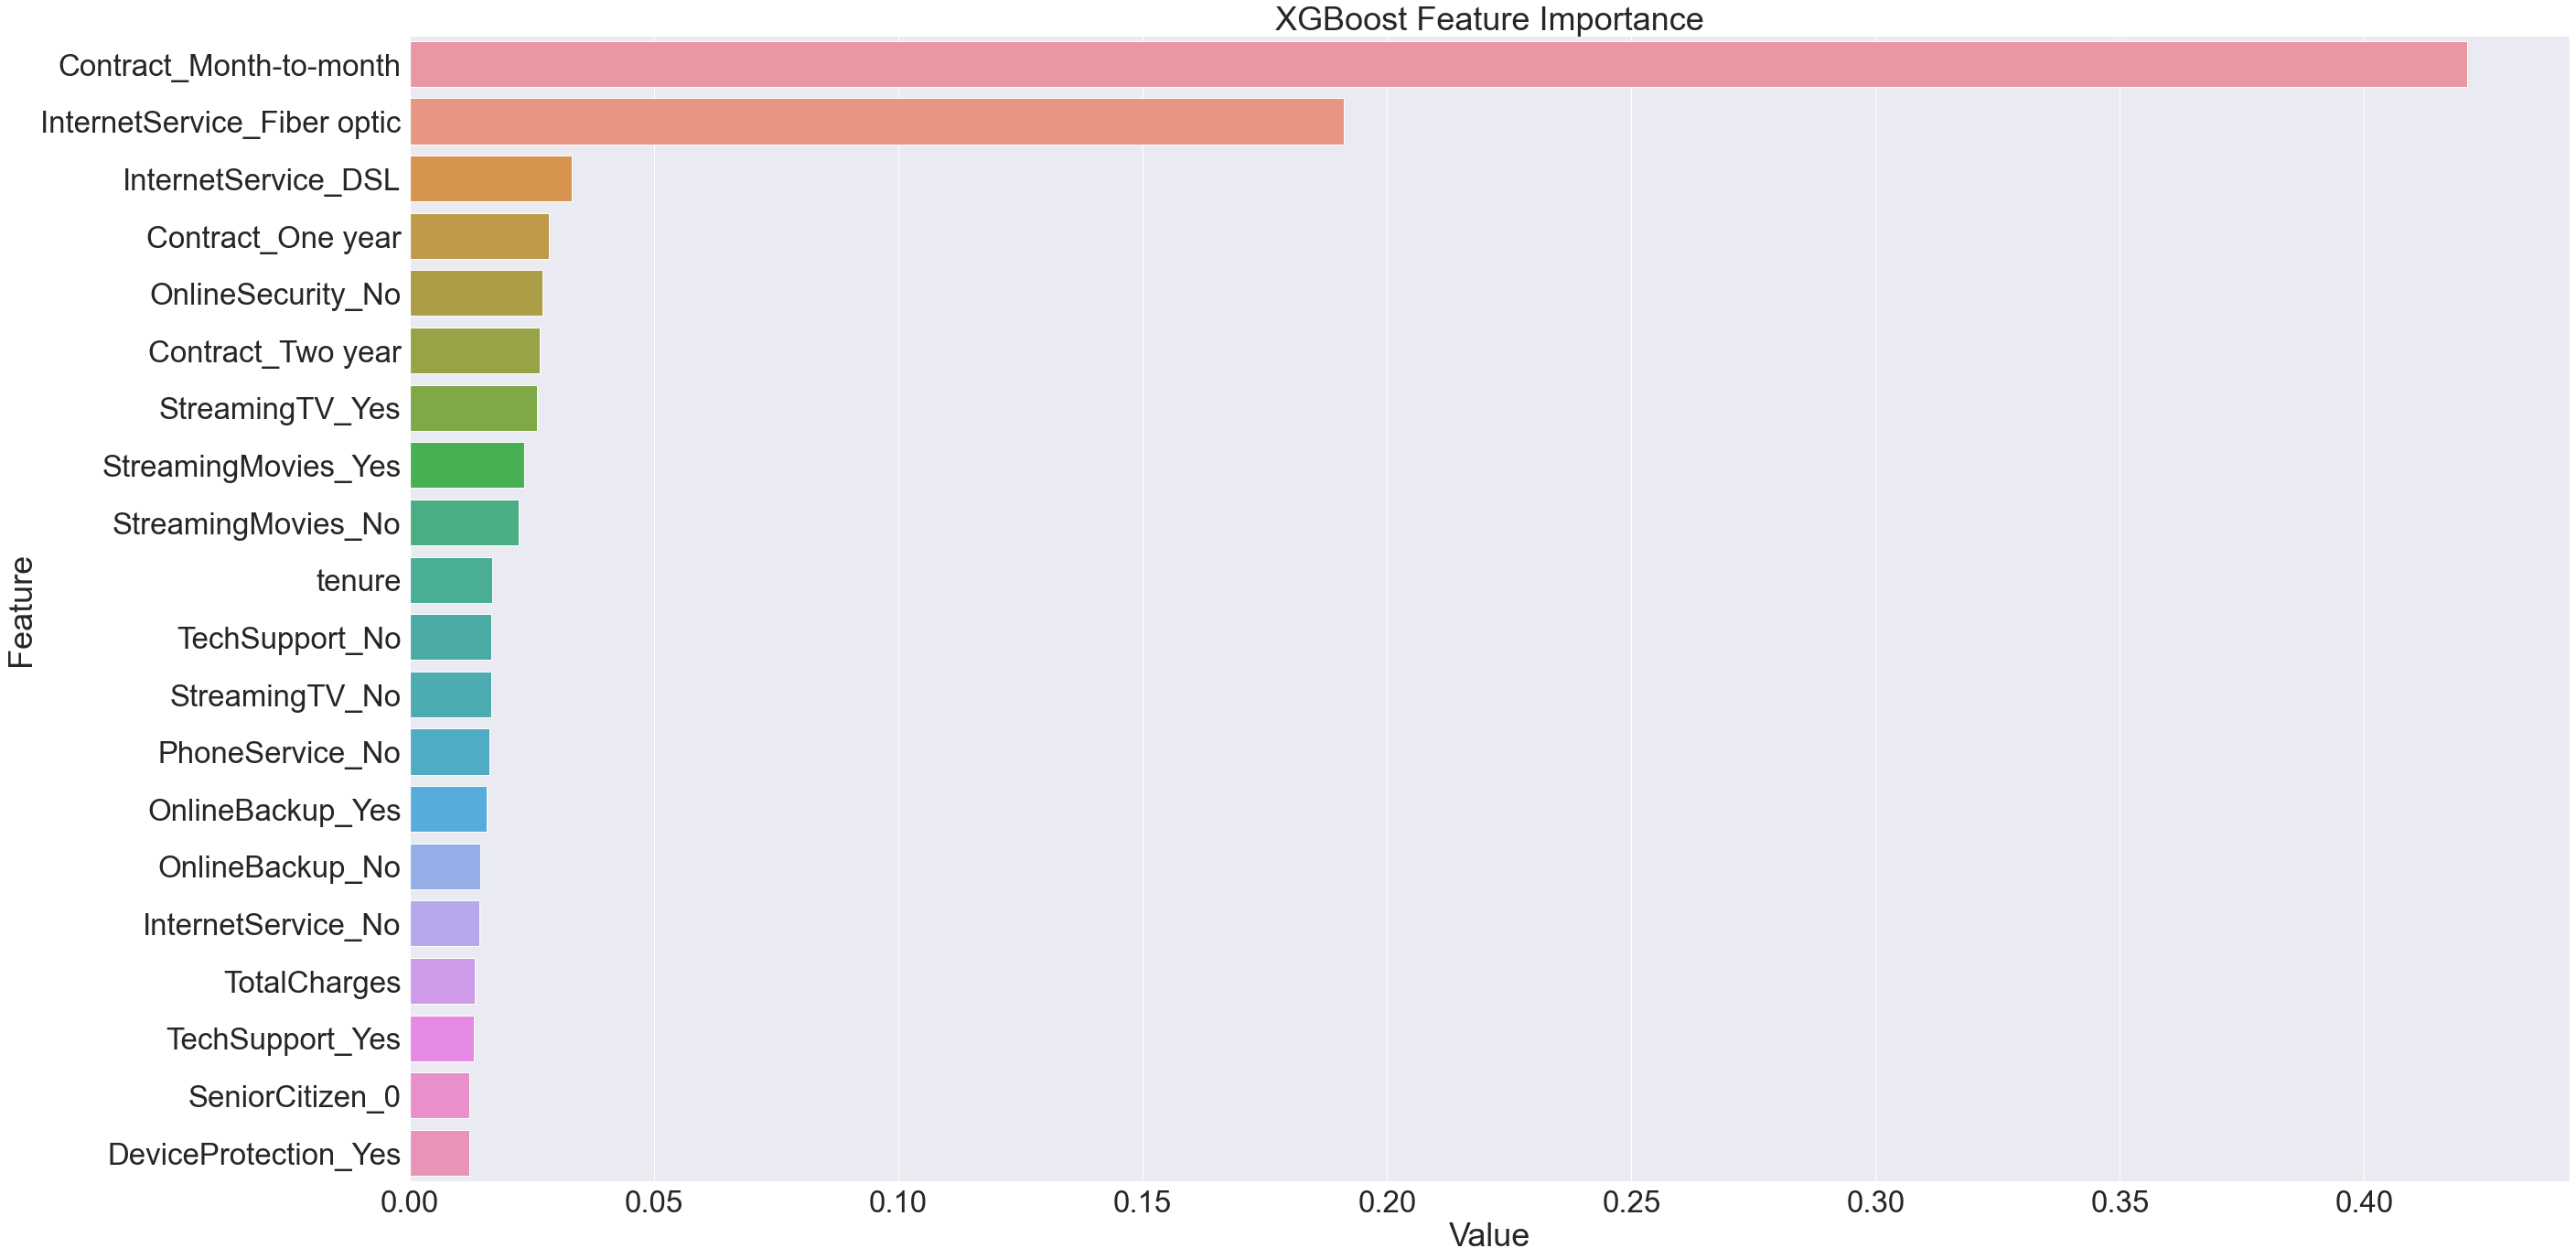

In [43]:
plotImp(model, feature_names)


In [44]:
# Model create
joblib.dump(pipeline_xgb, 'model.pkl')

['model.pkl']

In [45]:
# load pipeline
pipeline_loaded = joblib.load('model.pkl')
# pipeline_loaded

In [46]:
pipeline_loaded.predict(X_test)

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [47]:
pipeline_loaded.score(X_test, y_test)

0.750591575958353

In [48]:
instance = ["Male", 0, "Yes", "No", 71, "Yes", "Yes", "Fiber optic", "No", "Yes", "Yes", "Yes", "Yes", 
            "Yes", "Two year", "Yes", "Credit card (automatic)", 108.6, "7690.9"]
_COLUMN_NAMES=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [49]:
pipeline_loaded.predict(pd.DataFrame(data=[instance], columns=_COLUMN_NAMES))

array(['Yes'], dtype=object)

In [50]:
@@

SyntaxError: invalid syntax (<ipython-input-50-72842c019211>, line 1)

In [51]:
# Model create
joblib.dump(pipeline_xgb, 'model.joblib')


['model.joblib']

In [52]:
model = joblib.load("./model.joblib")


In [53]:
instance = ["Male", 0, "Yes", "No", 71, "Yes", "Yes", "Fiber optic", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Two year", "Yes", "Credit card (automatic)", 108.6, "7690.9"]
_COLUMN_NAMES=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [54]:
model.predict(pd.DataFrame(data=[instance], columns=_COLUMN_NAMES))


array(['Yes'], dtype=object)

In [55]:
model.predict(X_test)

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

### Using GridSearchCV

In [ ]:
grid_param = [
    {"RForest": [RandomForestClassifier()],
    "RForest__n_estimators":[10,50,100],  
    "RForest__max_leaf_nodes": [5, 6,8]}]
gridsearch = GridSearchCV(pipeline_rf, grid_param, cv=5, verbose=1,n_jobs=-1)

In [ ]:
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
best_model.score(X_test,y_test)

In [ ]:
@@@

# Feature Ranking

In [ ]:
X__train = pd.DataFrame(transformed_train, columns=numeric_features+cat_cols.tolist())
X__test = pd.DataFrame(pipeline.transform(X_test))

X = pd.concat([X__train, X__test])
Y = pd.concat([y_train, y_test])

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
X_train.columns

In [ ]:
# Extract the input variable and target variable
# X = trainDf.drop('loan_status', axis=1)

# Y = trainDf[['loan_status']]

# Store the column/feature names into a list "colnames"
colnames = list(X_train.columns)

In [ ]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
# Construct Recursive Feature Elimination ( RFE ) of the Logistic Regression model
lr = LogisticRegression(random_state= 42)  #lr = LinearRegression(normalize=True)
lr.fit(X,Y)

#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, ) #verbose =3
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [ ]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X,Y)
ranks["DT"] = ranking(dt.feature_importances_, colnames)

In [ ]:
# Random Forest Classifier

rf = RandomForestClassifier(n_jobs=-1, n_estimators=9, ) #verbose=3
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

# Creating the Feature Ranking Matrix
We combine the scores from the various methods above and output it in a matrix form for convenient viewing as such:

In [ ]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, [ranks[method][name] for method in methods]))))

# Conclution: 

The results as per the Accuracy for Decision Tree is 86%.

The training set should be used to build machine learning models. The test set should be used to see how well the model performs on unseen data.

For the test set, they do not provide the ground truth for each passenger. It is the challenge to predict these outcomes. For each passenger in the test set, use the trained model to predict whether or not they survived the sinking of the Titanic.
